<a href="https://colab.research.google.com/github/dorin133/Machine-Learning-236756-all-HW/blob/master/HW2%20-%20236756.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.spatial import distance
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
#for Q10
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#for Q13
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#for Q15
from sklearn.model_selection import GridSearchCV
#for Q19
from sklearn.preprocessing import PolynomialFeatures

pd.options.mode.chained_assignment = None

In [ ]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]
#for our usage
train_dataset = pd.read_csv('train_major1.csv', sep=',', header=0)

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving train_major1.csv to train_major1.csv


In [ ]:
train_dataset.head()

,Unnamed: 0,cough,fever,shortness_of_breath,A+,A-,O+,patient_id,num_of_siblings,household_income,sugar_levels,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_07,PCR_10,risk,spread,covid
0,0,1,0,1,0,0,1,3367,0.333333,0.141168,0.146770,0.856280,0.705376,0.030715,2.231972,-0.570937,0.892390,-0.856189,High,Low,True
1,1,1,0,1,1,0,0,6173,0.111111,1.000000,-0.133286,0.701277,-0.034266,-1.449647,-1.362963,1.300135,0.197576,0.018217,High,High,True
2,2,0,0,0,0,0,1,10266,0.111111,0.581382,0.482837,2.106387,-0.221939,-0.273916,1.148324,-1.194627,1.654190,0.018217,Low,Low,False
3,3,0,1,0,0,0,1,7391,0.555556,0.220846,-1.141487,-1.857126,-0.308387,1.419492,1.375088,-0.570937,0.568284,0.018217,Low,High,True
4,4,0,0,0,1,0,0,1230,0.333333,0.324847,1.491038,-0.759922,-0.048606,-0.251331,0.050355,-0.570937,-1.422283,-0.856189,High,Low,True


In [ ]:
# code to convert a bool column to +1 , -1
def convert_High_Low_to_int(column, inplace=True):
  for i in range(column.size):
    if(column[i] == 'High'):
      column[i]=1
    else:
      column[i]=-1
  column = column.astype(int)

def convert_zeros_to_minus_one(column, inplace=True):
  for i in range(column.size):
    if(column[i] == 0):
      column[i]=-1

In [ ]:
convert_High_Low_to_int(train_dataset['spread'])
convert_High_Low_to_int(train_dataset['risk'])
train_dataset['covid'] = train_dataset['covid'].astype(int)
train_dataset['risk'] = train_dataset['risk'].astype(int)
train_dataset['spread'] = train_dataset['spread'].astype(int)
convert_zeros_to_minus_one(train_dataset['covid'])

In [ ]:
# knn implementation
from sklearn.base import BaseEstimator,ClassifierMixin
class kNN(BaseEstimator, ClassifierMixin):
 def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors

 def fit(self, X, y):
    self.features = X
    self.labels = y
    return self
 
 def predict(self, X):
# Note: You can use self.n_neighbors here
    predictions = None
    #Step 1: calculate matrix of distances
    distance_matrix = distance.cdist(X, self.features, metric='euclidean')
    #Step 2: sort indexes of closests(examples, aka rows) to each point
    idx = np.argpartition(distance_matrix, self.n_neighbors)
    #Step 3: find 5 closests to each point. now idx holds the n most close labels.
    idx = self.labels[idx[:, :self.n_neighbors]]
    #Step 4: for each row return the most popular value(label) 
    predictions = stats.mode(np.transpose(idx))
    return predictions[0][0]


In [ ]:
#code of visualize_clf
def visualize_clf(clf, X, Y, title, marker_size=250):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["P", "v"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())
    plot_step = 0.02

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(range(-1, n_classes, 2), palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

In [ ]:
X_toy, y_toy = ds.make_classification(n_samples=100, n_features=2,
 random_state=3, flip_y = 0.1,
 n_informative=2, n_redundant=0)
convert_zeros_to_minus_one(y_toy)

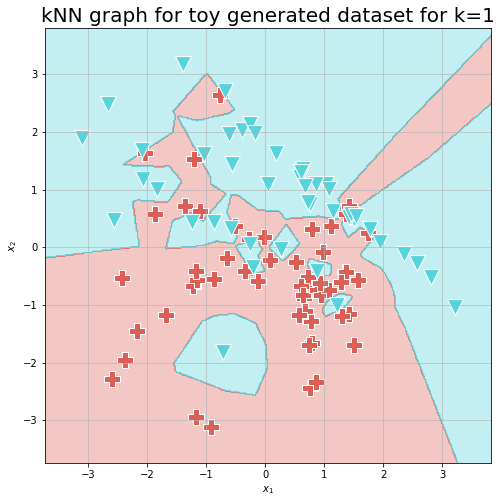

In [ ]:
#For Q1 - k=1
knn1 = kNN(1)
knn1.fit(X_toy, y_toy)
visualize_clf(knn1, X_toy, y_toy,"kNN graph for toy generated dataset for k=1")

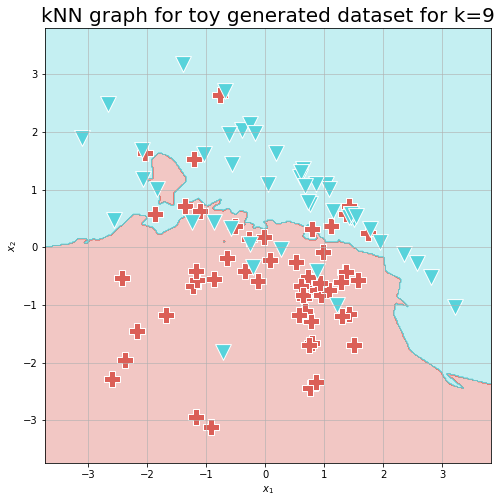

In [ ]:
#For Q1 - k=9
knn9 = kNN(9)
knn9.fit(X_toy, y_toy)
visualize_clf(knn9, X_toy, y_toy,"kNN graph for toy generated dataset for k=9")

In [ ]:
train_dataset = train_dataset.drop(['Unnamed: 0'], axis=1, inplace=False)

In [ ]:
train_dataset.head()

,cough,fever,shortness_of_breath,A+,O+,patient_id,num_of_siblings,household_income,sugar_levels,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_07,PCR_10,risk,spread,covid
0,1,0,1,0,1,3367,3.0,124.9,85.0,0.461612,0.386966,183.819449,367.718270,2.0,8.654551,4.0,1,-1,1
1,1,0,1,1,0,6173,1.0,880.5,80.0,0.376239,-0.025966,60.854946,63.820602,5.0,1.967418,5.0,1,1,1
2,0,0,0,0,1,10266,1.0,512.2,91.0,1.150149,-0.130741,158.515594,276.112191,1.0,15.986387,5.0,-1,-1,-1
3,0,1,0,0,1,7391,5.0,195.0,62.0,-1.032886,-0.179003,299.176571,295.281624,2.0,5.535240,5.0,-1,1,1
4,0,0,0,1,0,1230,3.0,286.5,109.0,-0.428565,-0.033971,160.391583,183.295351,2.0,-13.622678,4.0,1,-1,1


In [ ]:
train_dataset.corr()

,cough,fever,shortness_of_breath,A+,O+,patient_id,num_of_siblings,household_income,sugar_levels,PCR_01,PCR_02,PCR_03,PCR_04,PCR_05,PCR_07,PCR_10,risk,spread,covid
cough,1.000000,0.014585,0.651804,0.025338,-0.035998,-0.013626,-0.008945,0.039918,-0.016284,0.012121,-0.013330,-0.028980,0.000754,0.012521,0.010653,0.027024,0.022021,-0.027742,0.250372
fever,0.014585,1.000000,-0.002801,0.004490,-0.006647,-0.018207,0.001416,-0.005938,-0.023164,0.002970,0.009461,0.042056,0.016916,-0.015570,0.041273,-0.007279,-0.032016,-0.015826,0.290249
shortness_of_breath,0.651804,-0.002801,1.000000,0.037790,-0.038844,-0.012775,-0.007653,0.036583,0.001353,0.002418,-0.026975,-0.028895,0.004436,-0.000982,0.011029,0.023164,0.001744,-0.029109,0.347528
A+,0.025338,0.004490,0.037790,1.000000,-0.569513,-0.015929,-0.001719,0.003236,0.041629,-0.005586,-0.026062,0.006060,0.014658,0.040489,0.029016,0.042200,0.018232,-0.035452,0.282940
O+,-0.035998,-0.006647,-0.038844,-0.569513,1.000000,-0.006167,-0.011505,0.014775,-0.038191,0.025168,-0.005413,0.005890,-0.056824,-0.009693,-0.014911,-0.059342,-0.016403,0.032929,-0.265875
patient_id,-0.013626,-0.018207,-0.012775,-0.015929,-0.006167,1.000000,-0.027299,0.024509,0.023636,0.010612,0.040330,-0.007548,0.013623,0.024610,-0.003819,0.044325,0.010513,-0.017507,-0.022008
num_of_siblings,-0.008945,0.001416,-0.007653,-0.001719,-0.011505,-0.027299,1.000000,-0.012375,-0.024830,-0.018365,-0.017224,-0.018480,0.013633,0.004437,-0.025843,0.028485,-0.007419,-0.011950,0.173495
household_income,0.039918,-0.005938,0.036583,0.003236,0.014775,0.024509,-0.012375,1.000000,0.000724,-0.000070,-0.014521,-0.018888,-0.019713,-0.024515,0.022065,-0.013554,-0.006340,0.049503,-0.023101
sugar_levels,-0.016284,-0.023164,0.001353,0.041629,-0.038191,0.023636,-0.024830,0.000724,1.000000,0.045782,0.013544,0.007787,-0.010250,0.028673,0.023118,0.007247,0.278073,-0.007616,0.021074
PCR_01,0.012121,0.002970,0.002418,-0.005586,0.025168,0.010612,-0.018365,-0.000070,0.045782,1.000000,-0.008754,-0.036026,0.010588,-0.002101,0.025553,-0.036003,0.023976,-0.010024,-0.001696


In [ ]:
#For Q2
data_copy = train_dataset.drop(['covid', 'risk'], 1)
s = data_copy.corr().spread.abs()
s.sort_values(kind="quicksort", ascending=False)

spread                 1.000000
PCR_10                 0.193695
PCR_07                 0.060639
household_income       0.049503
A+                     0.035452
O+                     0.032929
shortness_of_breath    0.029109
PCR_02                 0.028779
cough                  0.027742
patient_id             0.017507
fever                  0.015826
num_of_siblings        0.011950
PCR_01                 0.010024
sugar_levels           0.007616
PCR_05                 0.004814
PCR_03                 0.003690
PCR_04                 0.003032
Name: spread, dtype: float64

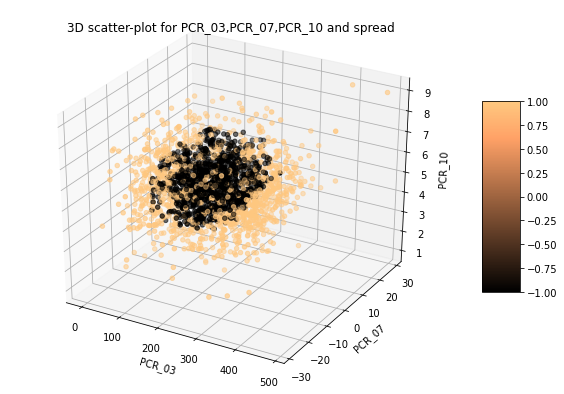

In [ ]:
#For Q3:

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
var = ax.scatter(train_dataset.PCR_03, train_dataset.PCR_07, train_dataset.PCR_10, c=train_dataset.spread, cmap='copper')
plt.title("3D scatter-plot for PCR_03,PCR_07,PCR_10 and spread")
ax.set_xlabel('PCR_03')
ax.set_ylabel('PCR_07')
ax.set_zlabel('PCR_10')
fig.colorbar(var, ax = ax, shrink = 0.5, aspect = 5)
#plt.grid(alpha=0.5)
 
# show plot
plt.show()

In [ ]:
#For Q5:

temp_df = (pd.DataFrame([train_dataset.PCR_03,train_dataset.PCR_07,train_dataset.PCR_10])).T
knn_spread = kNN(11)
knn_spread.fit(temp_df.to_numpy(), train_dataset.spread.to_numpy())

knn_spread.score(temp_df.to_numpy(), train_dataset.spread.to_numpy())

0.8108333333333333

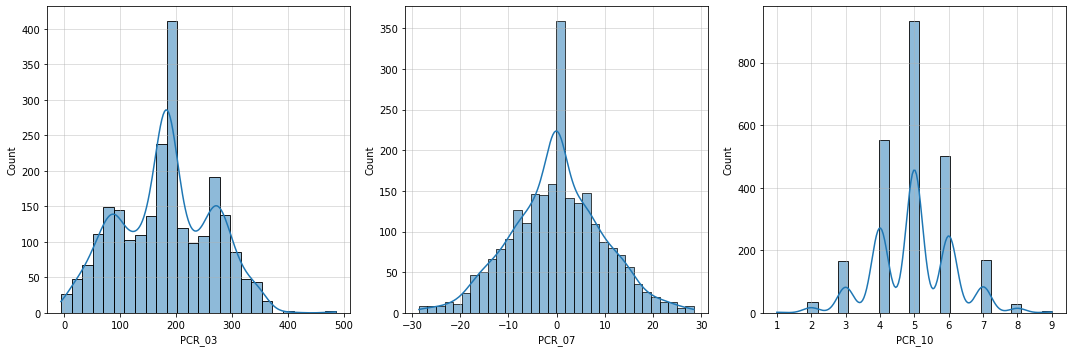

In [ ]:
# #FOR TESTS PURPOSE - BEFORE NORMALIZE
# COL_NAME = ['PCR_03','PCR_07','PCR_10']
# COLS = 3
# ROWS = int(np.ceil(len(COL_NAME) / COLS))
# plt.figure(figsize=(15, 5 * ROWS))
# for i, column in enumerate(COL_NAME, 1):
#  plt.subplot(ROWS,COLS,i)
#  sns.histplot(data=temp_df, x=column, kde=True)
#  plt.grid(alpha=0.5)
# plt.tight_layout()

In [ ]:
Normalize PCR_03,PCR_07 and PCR_10 in temp_df for Q6

scaler = StandardScaler()
scaler.fit(temp_df)
temp_df1 = pd.DataFrame(scaler.transform(temp_df))

temp_df['PCR_03'] = temp_df1.iloc[:,[True,False,False]]
temp_df['PCR_07'] = temp_df1.iloc[:,[False,True,False]]
temp_df['PCR_10'] = temp_df1.iloc[:,[False,False,True]]

In [ ]:
# WAS FOR TEST PURPOSE RO DECIDE MIN-MAX OR Z-SCORE IN Q7

# scaler2 = MinMaxScaler()
# temp_df2 = pd.DataFrame(scaler2.fit_transform(temp_df))
# temp_df['PCR_03'] = temp_df2.iloc[:,[True,False,False]]
# temp_df['PCR_07'] = temp_df2.iloc[:,[False,True,False]]
# temp_df['PCR_10'] = temp_df2.iloc[:,[False,False,True]]

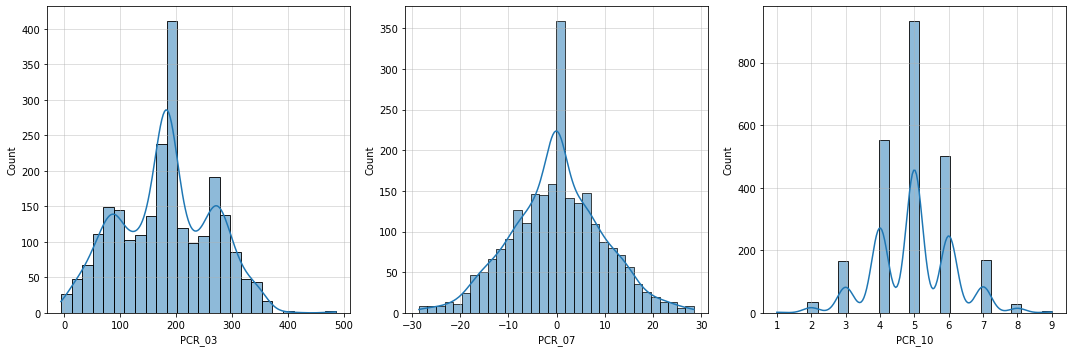

In [ ]:
# #FOR TESTS PURPOSE - AFTER NORMALIZE
# COL_NAME = ['PCR_03','PCR_07','PCR_10']
# COLS = 3
# ROWS = int(np.ceil(len(COL_NAME) / COLS))
# plt.figure(figsize=(15, 5 * ROWS))
# for i, column in enumerate(COL_NAME, 1):
#  plt.subplot(ROWS,COLS,i)
#  sns.histplot(data=temp_df, x=column, kde=True)
#  plt.grid(alpha=0.5)
# plt.tight_layout()

In [ ]:
#For Q7

knn_normal = kNN(11)
knn_normal.fit(temp_df.to_numpy(), train_dataset.spread.to_numpy())
knn_normal.score(temp_df.to_numpy(), train_dataset.spread.to_numpy())

0.8108333333333333

In [ ]:
from scipy.interpolate import make_interp_spline
#8-folds preparation to calculate optomal k tuning hyper-parameter, For Q9:

index_arr = np.arange(1,61,2)
test_scores_y = np.zeros(30)
train_scores_y = np.zeros(30)
i=0
for k in range(1,61,2):
  clf = kNN(k)
  clf.fit(temp_df.to_numpy(), train_dataset.spread.to_numpy())
  cv_results = cross_validate(clf, temp_df.to_numpy(), train_dataset.spread.to_numpy(), cv=8, return_train_score=True)
  test_scores_y[i] = cv_results['test_score'].mean()
  train_scores_y[i] = cv_results['train_score'].mean()
  i+=1

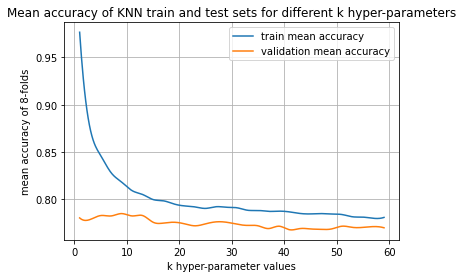

In [ ]:
#Plotting for Q9:

X_train_Spline = make_interp_spline(index_arr, train_scores_y)
X_test_Spline = make_interp_spline(index_arr, test_scores_y) 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(index_arr.min(), index_arr.max(), 500)
train_Y_ = X_train_Spline(X_)
test_Y_ = X_test_Spline(X_)
 
# Plotting the Graph
plt_train, = plt.plot(X_, train_Y_, label="train mean accuracy")
plt_test, = plt.plot(X_, test_Y_, label="validation mean accuracy")
plt.legend(handles=[plt_train,plt_test])
plt.title("Mean accuracy of KNN train and test sets for different k hyper-parameters")
plt.xlabel("k hyper-parameter values")
plt.ylabel("mean accuracy of 8-folds")
plt.grid()
plt.show()

In [ ]:
#find best k, validation accuracy and train accuracy for Q9:

print("best k is " + str(2*(test_scores_y.argmax())+1))
print ("validation accuracy is " +str(100*test_scores_y[test_scores_y.argmax()]))
print ("train accuracy is " + str(100*train_scores_y[test_scores_y.argmax()]))

best k is 9
validation accuracy is 78.49999999999999
train accuracy is 81.82738095238096


In [ ]:
#Calculate confusion matrix for Q10:

clf_optimal = kNN(9)
clf_optimal.fit(temp_df.to_numpy(), train_dataset.spread.to_numpy())
y_pred = cross_val_predict(clf_optimal, temp_df.to_numpy(), train_dataset.spread.to_numpy(), cv=8)
conf_mat = confusion_matrix(train_dataset.spread.to_numpy(), y_pred)
print(conf_mat)

[[1016  175]
 [ 341  868]]


In [ ]:
#Compute 10 most correlated features to risk for Q12:

data_copy = train_dataset.drop(['covid', 'spread'], 1)
s = data_copy.corr().risk.abs()
s.sort_values(kind="quicksort", ascending=False)

risk                   1.000000
sugar_levels           0.278073
PCR_05                 0.202970
PCR_07                 0.042274
PCR_03                 0.033277
fever                  0.032016
PCR_01                 0.023976
cough                  0.022021
PCR_02                 0.020429
A+                     0.018232
PCR_04                 0.017656
O+                     0.016403
PCR_10                 0.011170
patient_id             0.010513
num_of_siblings        0.007419
household_income       0.006340
shortness_of_breath    0.001744
Name: risk, dtype: float64

In [ ]:
#Training a model with ID3 and max_depth=4 for Q13:

temp_tree_df = train_dataset.copy()
temp_tree_df = temp_tree_df.drop(['risk', 'covid', 'spread', 'patient_id'], axis=1)
clf_tree = DecisionTreeClassifier(random_state=0, max_depth=4, criterion='entropy')
clf_tree.fit(temp_tree_df.to_numpy(), train_dataset.risk.to_numpy())
clf_tree.score(temp_tree_df.to_numpy(), train_dataset.risk.to_numpy())

0.73

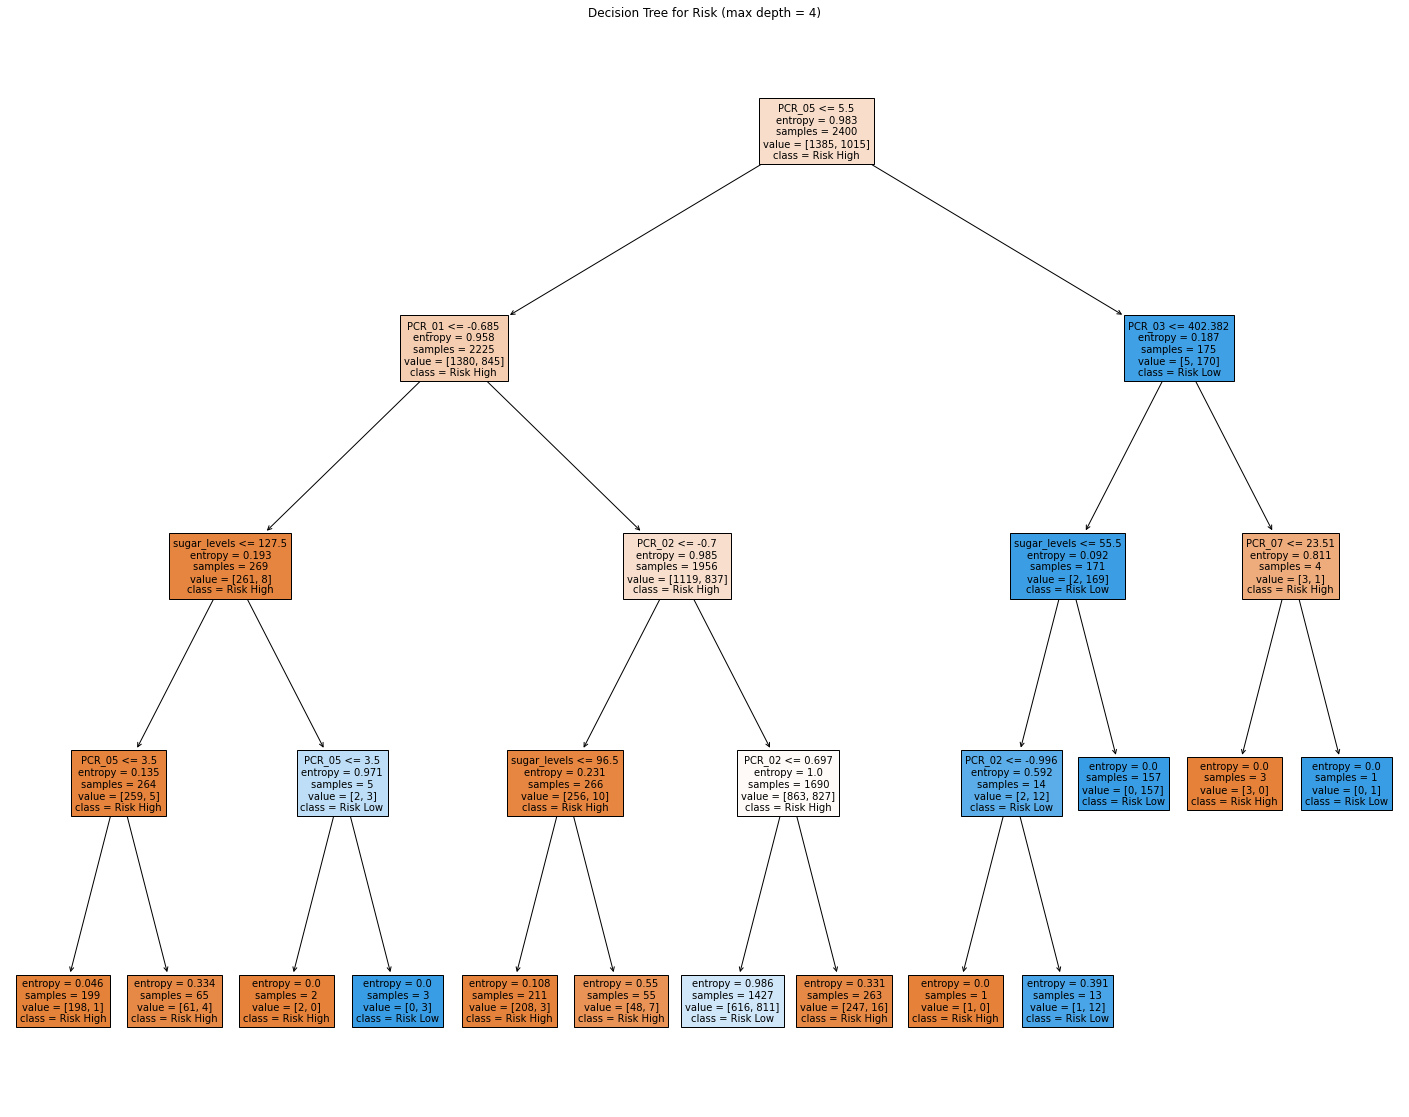

In [ ]:
#Plot the tree for Q13:
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot()
tree.plot_tree(clf_tree, feature_names=temp_tree_df.columns,  class_names=['Risk High', 'Risk Low'],fontsize=10 ,ax=ax ,filled=True)
_ = ax.set_title("Decision Tree for Risk (max depth = 4)")

In [ ]:
#Tuning hyper parameters 'mex_depth' and 'min_samples_leaf' for Q15:

clf_tree1 = DecisionTreeClassifier(random_state=0, criterion='entropy')
param_dict = {"max_depth" : range(4,18), "min_samples_leaf" : range(1,40, 3)}
grid = GridSearchCV(clf_tree1, param_grid = param_dict, cv=8, return_train_score=True)
_ = grid.fit(temp_tree_df.to_numpy(), train_dataset.risk.to_numpy())

In [ ]:
#print the best hyper-parameters we found for Q15:

print(grid.best_estimator_)
print("Best accuracy is " + str(grid.best_score_))

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       random_state=0)
Best accuracy is 0.9054166666666668


In [ ]:
val_scores = grid.cv_results_['mean_test_score'].reshape(len(param_dict['max_depth']),len(param_dict['min_samples_leaf']))
train_scores = grid.cv_results_['mean_train_score'].reshape(len(param_dict['max_depth']),len(param_dict['min_samples_leaf']))

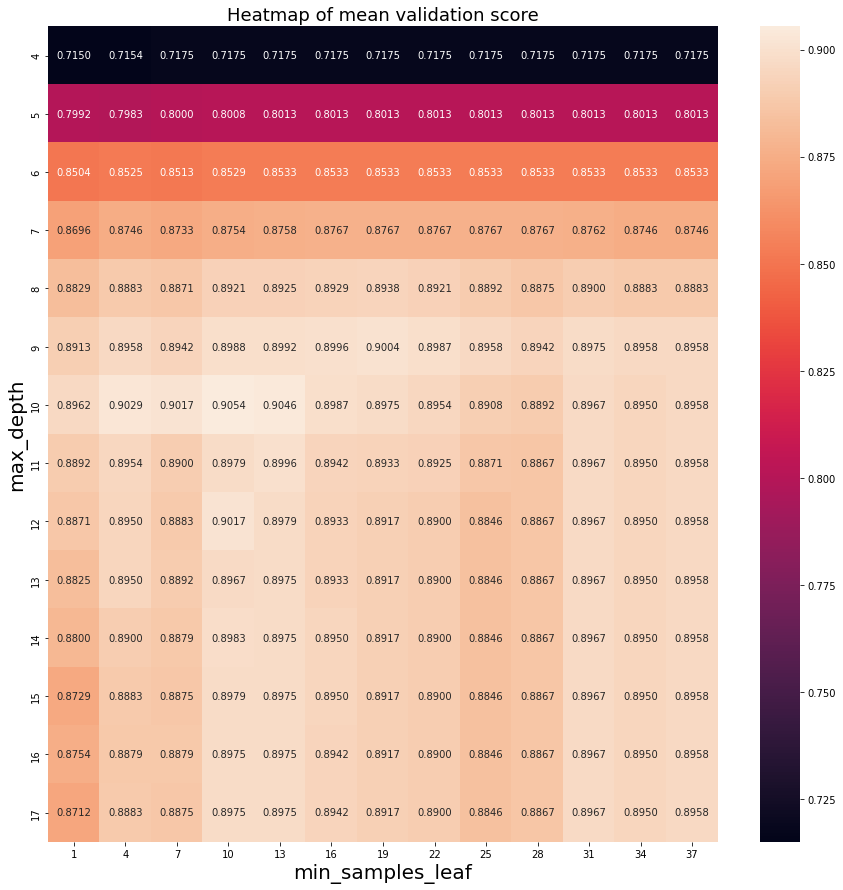

In [ ]:
#computing heat-map of validation scores for Q15


plt.figure(figsize=(15, 15))
ax = sns.heatmap(val_scores, yticklabels =param_dict['max_depth'] , xticklabels=param_dict['min_samples_leaf'] ,annot=True, fmt=".4f")
_ =ax.set_xlabel('min_samples_leaf', fontsize=20)
_ =ax.set_ylabel('max_depth', fontsize=20)
_ = ax.set_title("Heatmap of mean validation score", fontsize  =18)

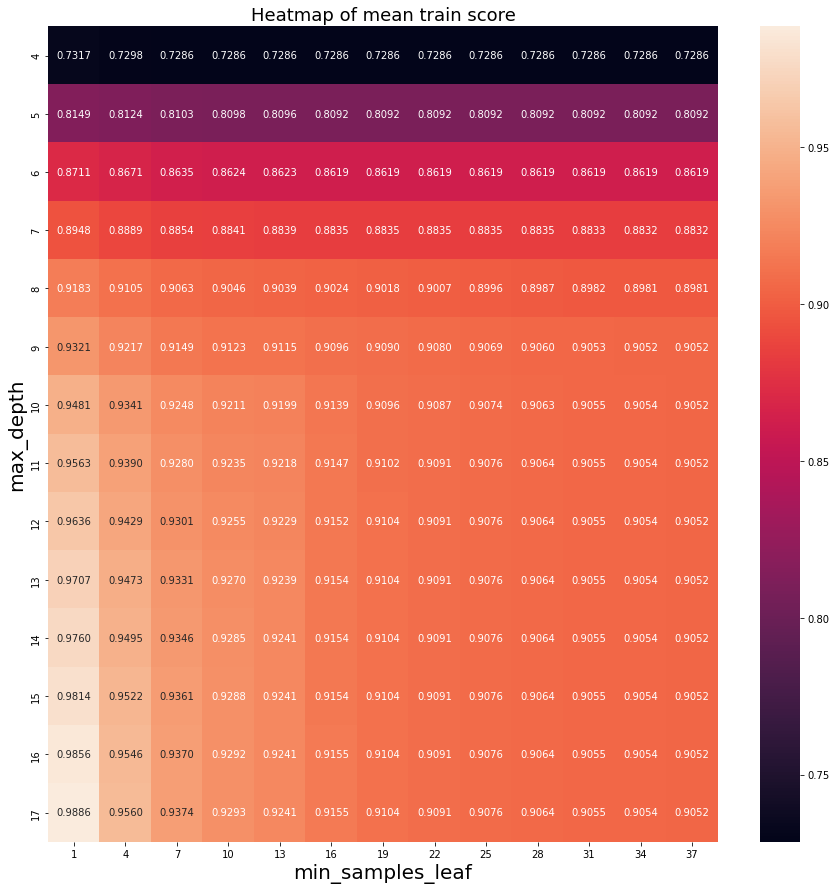

In [ ]:
#computing heat-map of validation scores for Q15

plt.figure(figsize=(15, 15))
ax = sns.heatmap(train_scores, yticklabels =param_dict['max_depth'] , xticklabels=param_dict['min_samples_leaf'] ,annot=True, fmt=".4f")
_ =ax.set_xlabel('min_samples_leaf', fontsize=20)
_ =ax.set_ylabel('max_depth', fontsize=20)
_ = ax.set_title("Heatmap of mean train score", fontsize  =18)

In [ ]:
#For Q16:

def f(z):
  vec = np.greater_equal(z,1)
  return vec-1

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = 32
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w.T) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        max_array=np.maximum(0, 1-hinge_inputs)
        loss = C*(np.sum(max_array)) +norm**2
        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        #First we calculate the gradient of SVM by w.
        margins = (X.dot(w.T) + b).reshape(-1, 1) # X(2400x16) w(16x1) -> 2400x1
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1)) # margin(2400x1) , y(2400,1) ->2400x1
        step1 = np.multiply(f(hinge_inputs), X)
        # step1 = ((f(hinge_inputs)).reshape(-1)).dot(X) 
        hinge_vector = np.multiply(step1, y.reshape(-1,1)) #good
        mat = np.matrix(hinge_vector)
        output = mat.sum(axis=0)
        # hinge_vec = step1.dot(y)).reshape(-1,1)
        g_w = 2*w + C*output

        #Now we'll calculate the other gradient by b
        vec_b = np.multiply((f(hinge_inputs)),y.reshape(-1,1))
        g_b = C*(np.sum(vec_b))
        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx: end_idx]
            batch_y = y[start_idx: end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = self.subgradient(self.w, self.b, self.C, batch_X, batch_y)

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = self.w - self.lr*g_w
            self.b = self.b - self.lr*g_b

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets; array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
        """
        # TODO: compute the predicted labels (+1 or -1)

        y_pred = np.sign(X.dot((self.w).T)+self.b)

        return y_pred


In [ ]:
def numerical_subgradient(w, b, C, X, y, delta=1e-4):
    w_ = w.copy()
    g_w = np.zeros_like(w_)
    orig_objective = SoftSVM.loss(w_, b, C, X, y)
    for i in range(g_w.shape[0]):
        w_[i] += delta
        perturbed_objective = SoftSVM.loss(w_, b, C, X, y)
        w_[i] -= delta
        g_w[i] = (perturbed_objective - orig_objective) / delta

    g_b = (SoftSVM.loss(w_, b + delta, C, X, y) - orig_objective) / delta
    return g_w, g_b


def compare_gradients(X, y, deltas, C=1, REPEATS=100):
    residual_means = []

    for delta in deltas:
        residuals = []

        for _ in range(REPEATS):
            # Randomize vectors in which the gradient is computed
            w = np.random.randn(X.shape[1])
            b = np.random.randn(1)

            # Compute the two types of gradients
            analytic_grad = SoftSVM.subgradient(w, b, C, X, y)[0]
            numeric_grad = numerical_subgradient(w, b, C, X, y, delta=delta)[0]

            residual = np.linalg.norm(numeric_grad - analytic_grad)
            residuals.append(residual)

        residual_means.append(np.mean(residuals))

    plt.plot(deltas, residual_means, linewidth=3)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\delta$', fontsize=18)
    plt.ylabel('dist(analytic, numeric$_\delta$)', fontsize=18)
    plt.ylabel(r'$\left\Vert p_{C}\left(w,b\right) - u_{\delta} \left(w,b\right)\right\Vert$', fontsize=18)
    plt.title("comparing numerical against analytical gradient", fontsize = 18)

    plt.grid(alpha=0.5)
    plt.show()


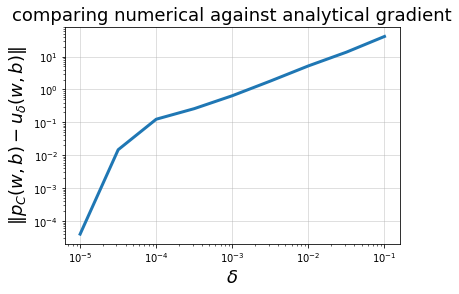

In [ ]:
#Plot for Q16

copy_train_df =temp_tree_df.copy()
compare_gradients(copy_train_df.to_numpy(), (train_dataset.covid).to_numpy(), deltas=np.logspace(-5, -1, 9))

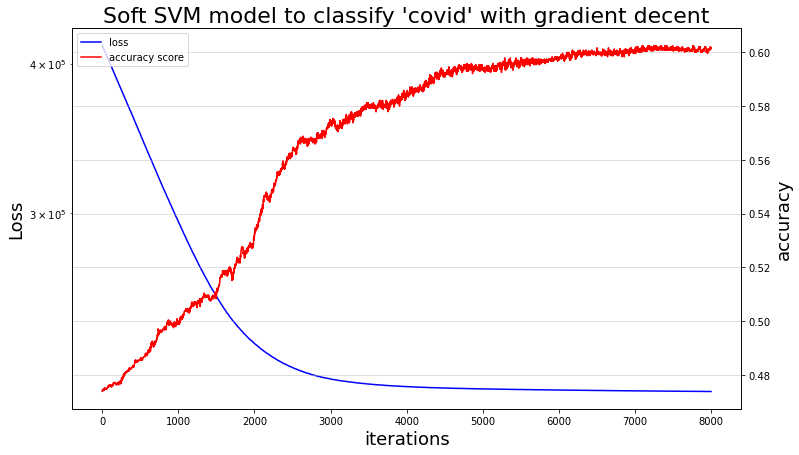

In [ ]:
#Train an SVM model and playing with the parameters (lr, max_iter) to achieve good accuracy for Q17

svm_df = train_dataset.copy()
svm_df = svm_df.drop(['covid', 'risk', 'spread', 'patient_id'], axis=1)

clf = SoftSVM(C=1e2, lr=1e-6)
losses, accuracies = clf.fit_with_logs(svm_df.to_numpy(), (train_dataset.covid).to_numpy(), max_iter=8000)
fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(111)
line1, = ax1.semilogy(losses, c='b', label='loss')
ax2 = ax1.twinx()
line2, = ax2.plot(accuracies, c='r', label='accuracy score')
ax2.grid(alpha=0.5)

plt.legend(handles=[line1,line2])

plt.title("Soft SVM model to classify 'covid' with gradient decent", fontsize=22)
ax1.set_xlabel('iterations', fontsize=18)
ax1.set_ylabel('Loss', fontsize=18)
ax2.set_ylabel('accuracy', fontsize=18)
plt.show()

In [ ]:
#printing the max train accuracy of our model for Q17:

print(max(accuracies))

0.6025


In [ ]:
#For Q19:
#prepare the poly_featurs for SVM
poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(temp_df.to_numpy())

index_arr = np.logspace(-10, -1, 10)
test_scores_y = np.zeros(10)
train_scores_y = np.zeros(10)
i=0
for k in np.logspace(-10, -1, 10):
  clf = SoftSVM(C=1e3, lr=k)
  clf.fit(poly_features, (train_dataset.spread).to_numpy(), max_iter=2000)
  cv_results = cross_validate(clf, poly_features, train_dataset.spread.to_numpy(), cv=8, return_train_score=True)
  test_scores_y[i] = cv_results['test_score'].mean()
  train_scores_y[i] = cv_results['train_score'].mean()
  i+=1

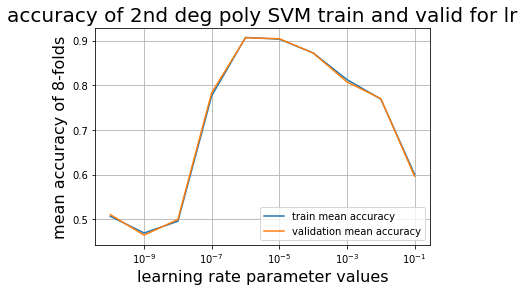

In [ ]:
#Plotting for Q19:
index_arr = np.logspace(-10, -1, 10)

# Plotting the Graph
plt_train, = plt.plot(index_arr, train_scores_y, label="train mean accuracy")
plt_test, = plt.plot(index_arr, test_scores_y, label="validation mean accuracy")
plt.legend(handles=[plt_train,plt_test])
plt.title("accuracy of 2nd deg poly SVM train and valid for lr", fontsize=20)
plt.xlabel("learning rate parameter values", fontsize = 16)
plt.ylabel("mean accuracy of 8-folds", fontsize = 16)
plt.xscale('log')
plt.grid()
plt.show()